<a href="https://colab.research.google.com/github/betatester25/Emotion-detection/blob/main/Emotion_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Импорт библиотек**

In [ ]:
import numpy as np
import pandas as pd
import os, cv2
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from PIL import Image
import random
import pathlib

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

import keras
!pip install np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
from keras.layers.convolutional import MaxPooling2D, Conv2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import batch_normalization
from tensorflow.keras.utils import to_categorical

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.datasets import make_classification
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

### **Загрузка данных**

In [ ]:
data_path = '/content/drive/MyDrive/Development/AI/Data/Emotions'

In [ ]:
data_dir = pathlib.Path(data_path)
data_dir

PosixPath('/content/drive/MyDrive/Development/AI/Data/Emotions')

In [ ]:
image_data_dic={


    'Anger':list(data_dir.glob('anger/*')),
    'Contempt':list(data_dir.glob('contempt/*')),
    'Disgust':list(data_dir.glob('disgust/*')),
    'Fear':list(data_dir.glob('fear/*')),
    'Happy':list(data_dir.glob('happiness/*')),
    'Neutral':list(data_dir.glob('neutrality/*')),
    'Sad':list(data_dir.glob('sadness/*')),
    'Surprise':list(data_dir.glob('surprise/*')),

}

In [ ]:
len(image_data_dic['Sad'])

746

### **Подготовка данных для обучений нейросети**

In [ ]:
image_labels_dic={


    'Anger':0,
    'Contempt':1,
    'Disgust':2,
    'Fear':3,
    'Happy':4,
    'Neutral':5,
    'Sad':6,
    'Surprise':7,
}

In [ ]:
img = cv2.imread(str(image_data_dic['Neutral'][0]))
print(img)
print("Размер изображения: ",img.shape)

[[[214 214 214]
  [214 214 214]
  [214 214 214]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[214 214 214]
  [214 214 214]
  [214 214 214]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[237 237 237]
  [237 237 237]
  [237 237 237]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 ...

 [[122 122 122]
  [122 122 122]
  [122 122 122]
  ...
  [153 153 153]
  [153 153 153]
  [153 153 153]]

 [[130 130 130]
  [130 130 130]
  [130 130 130]
  ...
  [103 103 103]
  [103 103 103]
  [103 103 103]]

 [[130 130 130]
  [130 130 130]
  [130 130 130]
  ...
  [103 103 103]
  [103 103 103]
  [103 103 103]]]
Размер изображения:  (224, 224, 3)


In [ ]:
X, y = [], []

for image_name, images in image_data_dic.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(48,48))
        X.append(resized_img)
        y.append(image_labels_dic[image_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=43)

In [ ]:
print(len(X_train))
print(len(X_test))

4446
1112


In [ ]:
X_train.shape

(4446, 48, 48, 3)

In [ ]:
X_test.shape

(1112, 48, 48, 3)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes=8
y_train = to_categorical(y_train, 8)
y_test = to_categorical(y_test, 8)

### **Создание нейросетевой модели**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same', input_shape=(48,48,3), activation='relu'))
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(8, activation='softmax'))

  # компиляция сети
  model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])

  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                        

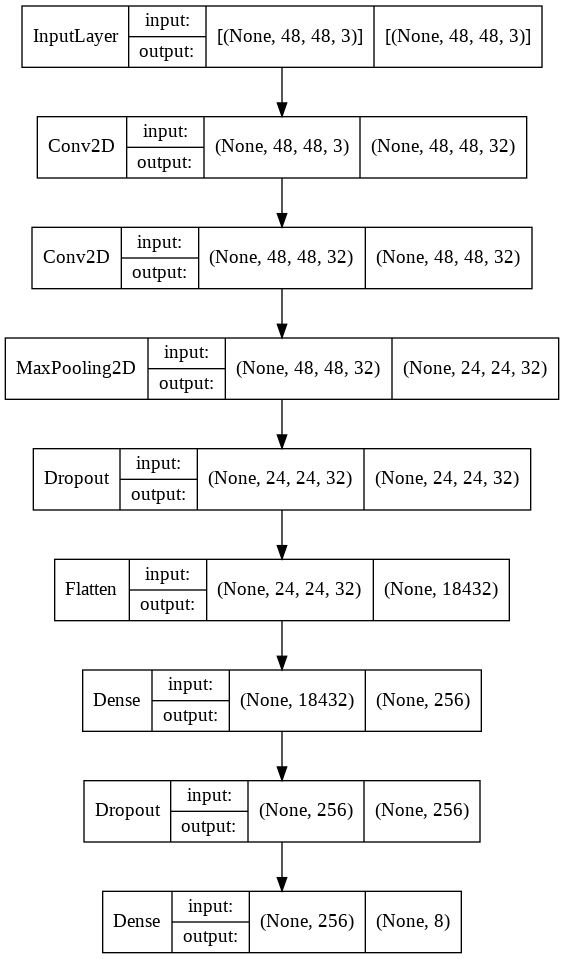

In [ ]:
plot_model(model, show_layer_names=False, show_shapes=True, to_file='model.png')

### **Обучение нейросети**

In [ ]:
batch_size = 10
epochs = 70
verbose = 1

Epoch 1/70
445/445 [==============================] - 44s 98ms/step - loss: 7.3195 - accuracy: 0.2377
Epoch 2/70
445/445 [==============================] - 47s 106ms/step - loss: 1.8733 - accuracy: 0.3016
Epoch 3/70
445/445 [==============================] - 43s 97ms/step - loss: 1.7254 - accuracy: 0.3644
Epoch 4/70
445/445 [==============================] - 44s 98ms/step - loss: 1.5874 - accuracy: 0.4202
Epoch 5/70
445/445 [==============================] - 44s 98ms/step - loss: 1.4327 - accuracy: 0.4838
Epoch 6/70
445/445 [==============================] - 44s 98ms/step - loss: 1.2535 - accuracy: 0.5596
Epoch 7/70
445/445 [==============================] - 45s 102ms/step - loss: 1.1172 - accuracy: 0.6093
Epoch 8/70
445/445 [==============================] - 44s 98ms/step - loss: 1.0080 - accuracy: 0.6527
Epoch 9/70
445/445 [==============================] - 44s 98ms/step - loss: 0.8647 - accuracy: 0.6955
Epoch 10/70
445/445 [==============================] - 43s 97ms/step - loss: 0.7

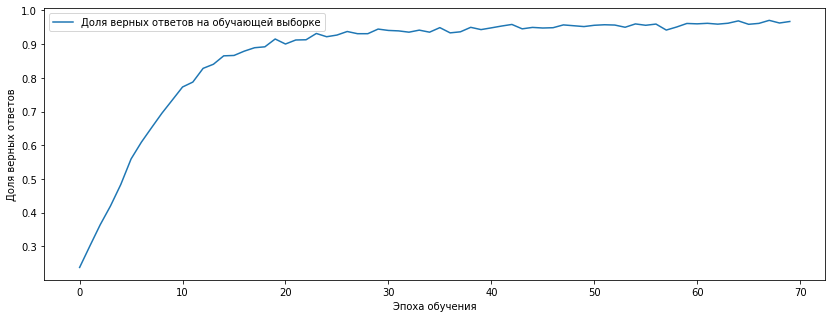

In [ ]:
network = model.fit(X_train, y_train,
                           batch_size=batch_size,
                           epochs=epochs,
                           verbose=verbose)

# отображаем график точности обучения
plt.figure(figsize=(14, 5))
plt.plot(network.history['accuracy'],
         label='Доля верных ответов на обучающей выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### **Сохранение модели**

In [ ]:
model.save('/content/drive/MyDrive/Development/AI/Research projects/Emotion recognition/best_weights/best_model.h5')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Development/AI/Research projects/Emotion recognition/best_weights/best_model.h5')

### **Проверка работы нейросети**

In [ ]:
# выбираем номер пример
n = np.random.randint(X_test.shape[0])
# получаем выход сети на этом примере
prediction = model.predict(X_test)


# выводим на экран результаты
print("Выход сети: ", prediction[n])

Выход сети:  [3.0021291e-02 1.9010123e-03 1.5203169e-01 1.6566753e-05 3.7322862e-03
 4.3992826e-04 8.1165338e-01 2.0390702e-04]


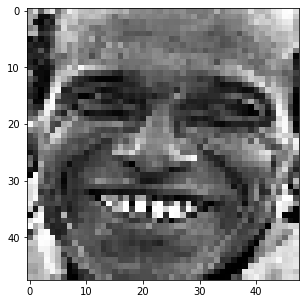

Обнаружена радость
Верный ответ: радость


In [ ]:
n = np.random.randint(X_test.shape[0])
prediction = model.predict(X_test)

plt.figure(figsize=(5, 5))
plt.imshow(Image.fromarray(X_test[n]).convert('RGBA'))
plt.show()

# определяем эмоцию
if np.argmax(prediction[n]) == 0:
  print('Обнаружен гнев')
elif np.argmax(prediction[n]) == 1:
  print('Обнаружено презрение')
elif np.argmax(prediction[n]) == 2:
  print('Обнаружено отвращение')
elif np.argmax(prediction[n]) == 3:
  print('Обнаружен страх')
elif np.argmax(prediction[n]) == 4:
  print('Обнаружена радость')
elif np.argmax(prediction[n]) == 5:
  print('Обнаружено нейтральное настроение')
elif np.argmax(prediction[n]) == 6:
  print('Обнаружена печаль')
elif np.argmax(prediction[n]) == 7:
  print('Обнаружено удивление')


# показываем правильный ответ
if np.argmax(y_test[n]) == 0:
  print('Верный ответ: гнев')
elif np.argmax(y_test[n]) == 1:
  print('Верный ответ: презрение')
elif np.argmax(y_test[n]) == 2:
  print('Верный ответ: отвращение')
elif np.argmax(y_test[n]) == 3:
  print('Верный ответ: страх')
elif np.argmax(y_test[n]) == 4:
  print('Верный ответ: радость')
elif np.argmax(y_test[n]) == 5:
  print('Верный ответ: нейстральное настроение')
elif np.argmax(y_test[n]) == 6:
  print('Верный ответ: печаль')
elif np.argmax(y_test[n]) == 7:
  print('Верный ответ: удивление')


In [ ]:
from tensorflow.keras.preprocessing import image
image = image.load_img('/content/drive/MyDrive/Development/AI/Data/Emotions/happiness/31875662386_65df018ffc_b_face.png', target_size=(48,48), color_mode='grayscale')

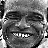

In [ ]:
image

(1, 48, 48, 3)


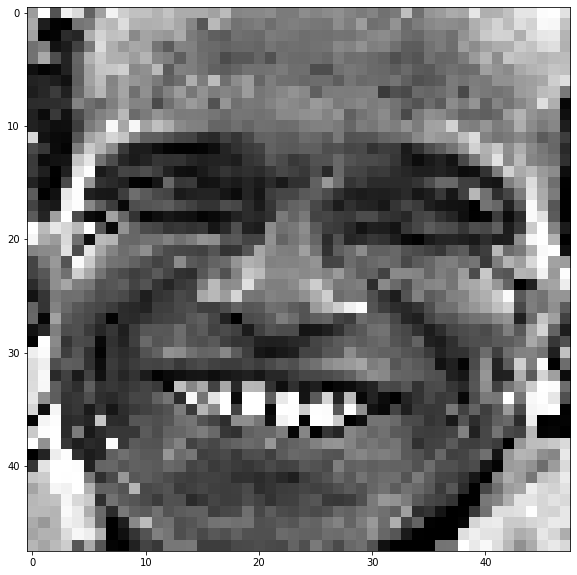

In [ ]:
# изменяем размер картинки под input_shape

iw, ih = image.size
w, h = (48, 48)
scale = min(w / iw, h / ih)
nw = int(iw * scale)
nh = int(ih * scale)
image_for_predict = image.resize((nw, nh), Image.BICUBIC)
new_image = Image.new('RGB', (48,48), (128, 128, 128))
new_image.paste(image_for_predict, ((w - nw) // 2, (h - nh) // 2))
image_for_predict = new_image
image_for_predict = np.array(image_for_predict) / 255.
plt.imshow(image_for_predict)
image_for_predict = image_for_predict.reshape(1, 48, 48, 3)
print (image_for_predict.shape)

In [ ]:
# выполняем распознавание
prediction = model.predict(image_for_predict)

# определяем эмоцию
if np.argmax(prediction) == 0:
  print('Обнаружен гнев')
elif np.argmax(prediction) == 1:
  print('Обнаружено презрение')
elif np.argmax(prediction) == 2:
  print('Обнаружено отвращение')
elif np.argmax(prediction) == 3:
  print('Обнаружен страх')
elif np.argmax(prediction) == 4:
  print('Обнаружена радость')
elif np.argmax(prediction) == 5:
  print('Обнаружено нейтральное настроение')
elif np.argmax(prediction) == 6:
  print('Обнаружена печаль')
elif np.argmax(prediction) == 7:
  print('Обнаружено удивление')

Обнаружена печаль


In [ ]:
np.argmax(prediction)

6